In [1]:
import sys
!{sys.executable} -m pip install -r ./requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 236.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 175.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 197.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 210.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 109.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 212.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 285.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 318.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 152.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 

In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from datetime import datetime as dt

/tmp/ipykernel_166/1246933356.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-12 15:48:01.698327: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-12 15:48:01.728035: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 15:48:01.728066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin c

In [7]:



yfin.pdr_override()

df = pdr.get_data_yahoo('IBM', start='2019-01-01', end='2024-02-01')

print(df)

/opt/app-root/lib64/python3.9/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02  107.084129  110.879539  106.778206  110.143402   85.522621   
2019-01-03  109.493309  109.827919  107.734222  107.944550   83.815269   
2019-01-04  109.856598  112.323135  109.407265  112.160614   87.088905   
2019-01-07  112.332695  113.604210  111.539200  112.954109   87.705025   
2019-01-08  114.397705  115.267685  113.747612  114.560226   88.952126   
...                ...         ...         ...         ...         ...   
2024-01-25  184.960007  196.899994  184.830002  190.429993  188.709549   
2024-01-26  191.309998  192.389999  186.160004  187.419998  185.726746   
2024-01-29  187.460007  189.460007  186.050003  187.139999  185.449280   
2024-01-30  187.710007  188.649994  186.770004  187.869995  186.172684   
2024-01-31  187.050003  187.649994  183.139999  183.660004  182.000717   

              Volume  
Date          

In [8]:
df = df.reset_index()

print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2019-01-02  107.084129  110.879539  106.778206  110.143402   85.522621   
1    2019-01-03  109.493309  109.827919  107.734222  107.944550   83.815269   
2    2019-01-04  109.856598  112.323135  109.407265  112.160614   87.088905   
3    2019-01-07  112.332695  113.604210  111.539200  112.954109   87.705025   
4    2019-01-08  114.397705  115.267685  113.747612  114.560226   88.952126   
...         ...         ...         ...         ...         ...         ...   
1274 2024-01-25  184.960007  196.899994  184.830002  190.429993  188.709549   
1275 2024-01-26  191.309998  192.389999  186.160004  187.419998  185.726746   
1276 2024-01-29  187.460007  189.460007  186.050003  187.139999  185.449280   
1277 2024-01-30  187.710007  188.649994  186.770004  187.869995  186.172684   
1278 2024-01-31  187.050003  187.649994  183.139999  183.660004  182.000717   

        Volume  
0      4434935  
1      4546648  


In [9]:
df.index = pd.to_datetime(df['Date'], format='%d.%m.%Y %H:%M:%S')

print(df)

                 Date        Open        High         Low       Close  \
Date                                                                    
2019-01-02 2019-01-02  107.084129  110.879539  106.778206  110.143402   
2019-01-03 2019-01-03  109.493309  109.827919  107.734222  107.944550   
2019-01-04 2019-01-04  109.856598  112.323135  109.407265  112.160614   
2019-01-07 2019-01-07  112.332695  113.604210  111.539200  112.954109   
2019-01-08 2019-01-08  114.397705  115.267685  113.747612  114.560226   
...               ...         ...         ...         ...         ...   
2024-01-25 2024-01-25  184.960007  196.899994  184.830002  190.429993   
2024-01-26 2024-01-26  191.309998  192.389999  186.160004  187.419998   
2024-01-29 2024-01-29  187.460007  189.460007  186.050003  187.139999   
2024-01-30 2024-01-30  187.710007  188.649994  186.770004  187.869995   
2024-01-31 2024-01-31  187.050003  187.649994  183.139999  183.660004   

             Adj Close    Volume  
Date           

<Axes: xlabel='Date'>

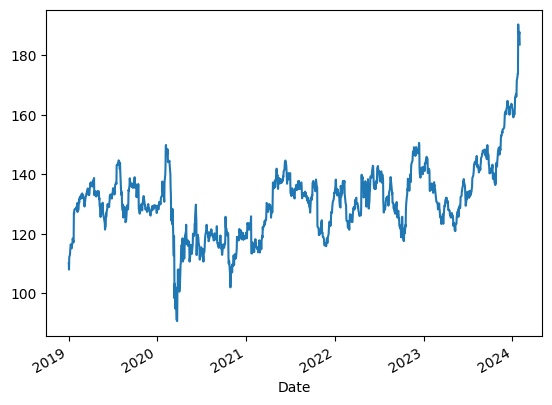

In [12]:
close_data = df['Close']
close_data.plot()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1279 entries, 2019-01-02 to 2024-01-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1279 non-null   datetime64[ns]
 1   Open       1279 non-null   float64       
 2   High       1279 non-null   float64       
 3   Low        1279 non-null   float64       
 4   Close      1279 non-null   float64       
 5   Adj Close  1279 non-null   float64       
 6   Volume     1279 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 79.9 KB


In [51]:
df.shape

(1279, 7)

In [52]:
# splitting date into training and testing 
data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print("training data: ",data_training.shape)
print("testing data: ", data_testing.shape)

training data:  (895, 1)
testing data:  (384, 1)


In [53]:
data_testing.head()

,Close
895,120.258125
896,120.659653
897,118.996178
898,119.808792
899,117.495216


In [54]:
data_training.head()

,Close
0,159.837479
1,161.816437
2,161.281067
3,162.074570
4,160.277252


In [55]:
# scaling of data using min max scaler (0,1)

scaler = MinMaxScaler(feature_range=(0,1))

In [56]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.8306951 ],
       [0.85443896],
       [0.8480155 ],
       [0.85753608],
       [0.83597157],
       [0.81153934],
       [0.83711855],
       [0.83941269],
       [0.83241566],
       [0.83872451],
       [0.8262216 ],
       [0.8263362 ],
       [0.86923601],
       [0.87474188],
       [0.93060321],
       [0.95801778],
       [0.96226188],
       [0.94666203],
       [0.92945623],
       [0.91477397],
       [0.91213582],
       [0.91546215],
       [0.92968562],
       [0.93014442],
       [0.95996792],
       [0.93370033],
       [0.94562966],
       [0.96249127],
       [0.97029129],
       [0.97912368],
       [0.99690288],
       [0.99403534],
       [0.98531774],
       [0.98061484],
       [0.99082361],
       [0.99655888],
       [0.99311757],
       [0.97075008],
       [0.97556776],
       [1.        ],
       [0.98371178],
       [0.97820591],
       [0.98302359],
       [0.98199122],
       [0.97132366],
       [0.94528547],
       [0.95274148],
       [0.937

In [57]:
data_training_array.shape

(895, 1)

In [58]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [59]:
model = Sequential()
model.add(LSTM(units= 50, activation= 'relu', return_sequences= True, 
               input_shape= (x_train.shape[1], 1)))

model.add(Dropout(0.2))


model.add(LSTM(units= 60, activation= 'relu', return_sequences= True))

model.add(Dropout(0.3))


model.add(LSTM(units= 80, activation= 'relu', return_sequences= True))

model.add(Dropout(0.4))


model.add(LSTM(units= 120, activation= 'relu'))

model.add(Dropout(0.5))


model.add(Dense(units= 1))

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [61]:
model.compile(optimizer='adam', loss="mean_squared_error")
model.fit(x_train, y_train, epochs= 25)

Epoch 1/25
25/25 [==============================] - 7s 158ms/step - loss: 0.1038
Epoch 2/25
25/25 [==============================] - 4s 157ms/step - loss: 0.0232
Epoch 3/25
25/25 [==============================] - 4s 158ms/step - loss: 0.0174
Epoch 4/25
25/25 [==============================] - 4s 157ms/step - loss: 0.0177
Epoch 5/25
25/25 [==============================] - 4s 157ms/step - loss: 0.0154
Epoch 6/25
25/25 [==============================] - 4s 158ms/step - loss: 0.0155
Epoch 7/25
25/25 [==============================] - 4s 158ms/step - loss: 0.0141
Epoch 8/25
25/25 [==============================] - 4s 156ms/step - loss: 0.0125
Epoch 9/25
25/25 [==============================] - 4s 154ms/step - loss: 0.0131
Epoch 10/25
25/25 [==============================] - 4s 154ms/step - loss: 0.0116
Epoch 11/25
25/25 [==============================] - 4s 154ms/step - loss: 0.0128
Epoch 12/25
25/25 [==============================] - 4s 157ms/step - loss: 0.0110
Epoch 13/25
25/25 [======

In [62]:
# save model
model.save('keras_model.h5')
model.save("latest_stock_predict.keras")

/opt/app-root/lib64/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
data_testing.head()

,Close
895,120.258125
896,120.659653
897,118.996178
898,119.808792
899,117.495216


In [64]:
data_training.tail(100)

,Close
795,123.231361
796,128.317398
797,123.852776
798,122.112808
799,112.629066
...,...
890,119.608032
891,120.812622
892,120.516251
893,123.011475


In [65]:
input_data = scaler.fit_transform(data_testing)
input_data
input_data.shape

(384, 1)

In [66]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)    
print(x_test.shape)
print(y_test.shape)

(284, 100, 1)
(284,)


In [67]:
# makeing predictions

y_predicted = model.predict(x_test)
y_predicted.shape

9/9 [==============================] - 1s 35ms/step


(284, 1)

In [68]:
scaler.scale_

array([0.02343715])

In [69]:
scaler = scaler.scale_
scaler

array([0.02343715])

In [70]:
scale_factor = 1/scaler[0]

y_predicted = y_predicted * scale_factor

y_test = y_test* scale_factor

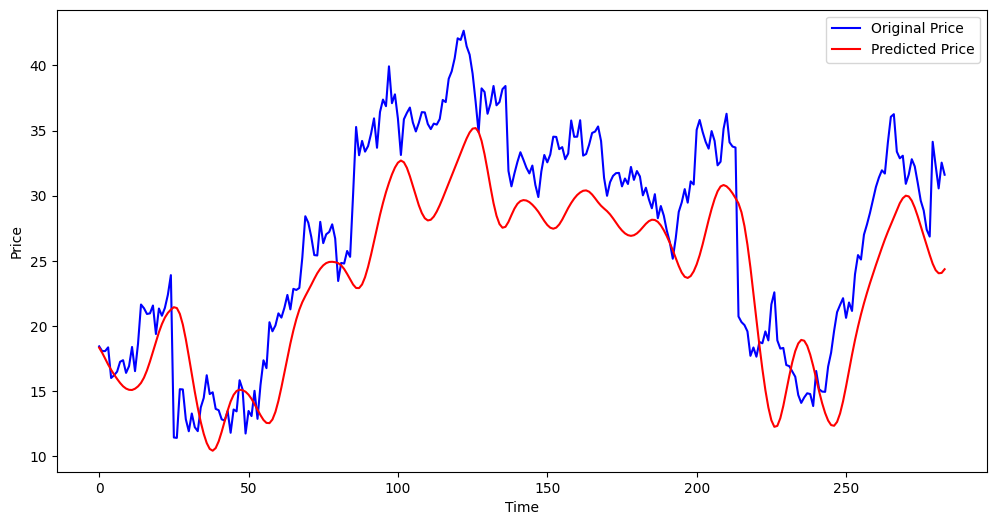

In [71]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [78]:
# Predict future price 
df1=df.reset_index()['Close']
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
datemax="24/06/2022"
datemax = datetime.strptime(datemax,"%d/%m/%Y")
x_input=df1[:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

time_str = input("enter time in this format yyyy-mm-dd")
#time=datetime.datetime.strptime(time_str, "%Y-%m-%d")
#date1=str(date1)
date1=datetime.strptime(time_str,"%Y-%m-%d")

nDay=date1-datemax
nDay=nDay.days
lst_output=[]
n_steps=1362
i=0

while(i<=nDay):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
res =scaler.inverse_transform(lst_output)
output = res[nDay-1]

enter time in this format yyyy-mm-dd 2022-06-06


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.